In [ ]:
%pip install opencv-python
%pip install pandas
%pip install matplotlib
%pip install PyWavelets
import cv2 as cv
import pandas as pd
import numpy as np 
import os
import matplotlib.pyplot as plt
import warnings
import pywt
warnings.filterwarnings('ignore')


    "id": 1,
    "name": "FR-II"

    "id": 2,
    "name": "FR-I"

    "id": 3,
    "name": "FR-X"

    "id": 4,
    "name": "R"

In [ ]:
import json
image_directory = r"../RadioGalaxyNET/train"
annotations_directory = r"../RadioGalaxyNET/annotations/train.json"
with open(annotations_directory) as json_data:
    data = json.load(json_data)

annotations = data["annotations"] 
images = data["images"]

In [ ]:
print(annotations[0])

In [ ]:
train_image_arr = []
train_segmentation = []
train_bbox = []
train_keypoints = []
train_label = []

for i in range(len(images)):
    
    file_name = images[i]["file_name"]
    image = cv.imread(os.path.join(image_directory, file_name))
    segmentation = annotations[i]["segmentation"]
    bbox = annotations[i]["bbox"]
    keypoints = annotations[i]["keypoints"]
    label = annotations[i]["category_id"]

    train_image_arr.append(image)
    train_segmentation.append(segmentation)
    train_bbox.append(bbox)
    train_keypoints.append(keypoints)
    train_label.append(label)

In [ ]:
from IPython.display import Image, display
#                                                      |this is the index of train, the 1 is something else
display(Image(data=cv.imencode('.jpg', train_image_arr[0])[1].tobytes()))
plt.imshow(train_image_arr[0])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


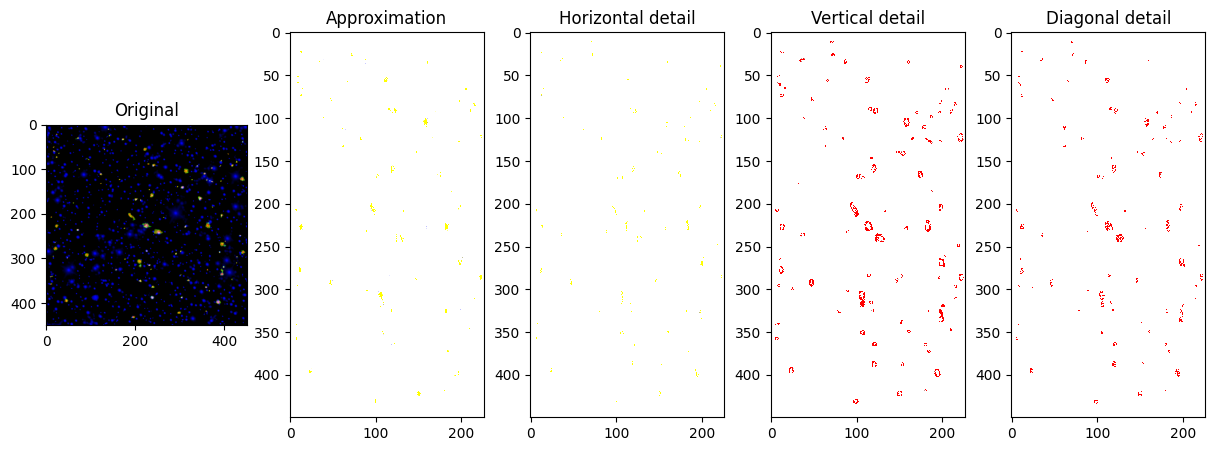

In [240]:
titles = ['Approximation', ' Horizontal detail',
          'Vertical detail', 'Diagonal detail']
coeffs2 = pywt.dwt2(train_image_arr[0], 'bior1.3')
LL, (LH, HL, HH) = coeffs2

fig = plt.figure(figsize=(15, 5))
ax1 = fig.add_subplot(1,5,1)
ax2 = fig.add_subplot(1,5,2)
ax3 = fig.add_subplot(1,5,3)
ax4 = fig.add_subplot(1,5,4)
ax5 = fig.add_subplot(1,5,5)

ax1.imshow(train_image_arr[0])
ax1.set_title("Original")
ax2.imshow(LL, interpolation="nearest") 
ax2.set_title("Approximation")
ax3.imshow(LH, interpolation="nearest") 
ax3.set_title("Horizontal detail")
ax4.imshow(HL, interpolation="nearest") 
ax4.set_title("Vertical detail")
ax5.imshow(HH, interpolation="nearest") 
ax5.set_title("Diagonal detail")
plt.show()

In [ ]:
fig = plt.figure(figsize=(15, 5))
plt.imshow(train_image_arr[0])
plt.show()

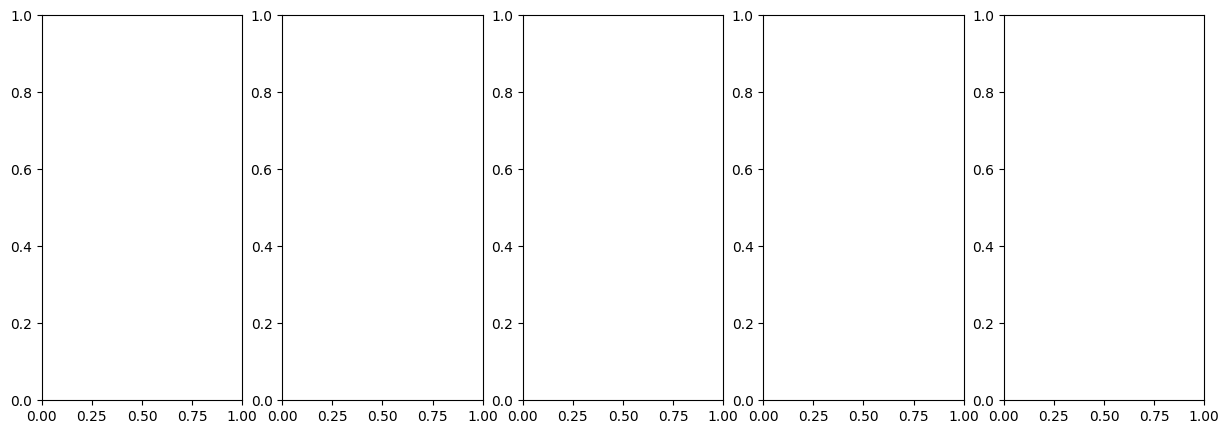

In [250]:
titles = ['Approximation', ' Horizontal detail',
          'Vertical detail', 'Diagonal detail']
coeffs2 = pywt.dwt2(train_image_arr[0], 'bior1.3')
LL, (LH, HL, HH) = coeffs2

fig = plt.figure(figsize=(15, 5))
ax1 = fig.add_subplot(1,5,1)
ax2 = fig.add_subplot(1,5,2)
ax3 = fig.add_subplot(1,5,3)
ax4 = fig.add_subplot(1,5,4)
ax5 = fig.add_subplot(1,5,5)


In [251]:
train_image_arr_wavelet = []

for i in range(len(images)):
    coeffs2 = pywt.dwt2(train_image_arr[i], 'bior1.3')
    LL, (LH, HL, HH) = coeffs2
    train_image_arr_wavelet.append(LH)

In [252]:
train_image_arr_wavelet[0]

array([[[  0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.],
        ...,
        [  0.,   0.,  -3.,   0.],
        [  0.,   0.,  12.,   0.],
        [  0.,   0., -12.,   0.]],

       [[  0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.],
        ...,
        [  0.,   0.,   0.,   0.],
        [  0.,   0.,  20.,   0.],
        [  0.,   0., -20.,   0.]],

       [[  0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.],
        ...,
        [  0.,   0.,   6.,   0.],
        [  0.,   0.,  32.,   0.],
        [  0.,   0., -32.,   0.]],

       ...,

       [[  0.,   0.,  -2.,   0.],
        [  0.,   0.,   2.,   0.],
        [  0.,   0.,  13.,   0.],
        ...,
        [  0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.]],

       [[  0.,   0.,  -3.,   0.],
        [  0.,   0.,   3.,   0.],
        [  0.,   0.,  10.,   0.],
        .